In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
from hot_sauce.config import Peppers
from hot_sauce.hot_sauce import (
    HotSauceData,
    sample_peppers,
    compute_color,
    enum_to_data_frame,
    compute_peppers_factor)

In [3]:
p = list(p for p in Peppers)[0]

In [4]:
p.name

'BANANA'

In [5]:
HotSauceData().sample(10)

,BANANA,JALAPENO,GUAJILLO,CAYENNE,HABANERO,RED_SAVINA,NAGA_MORICH,COLOR,AGE,HOTNESS
0,True,True,False,False,True,True,False,0.417003,5,11.0
1,False,True,True,True,True,False,False,0.340871,5,7.0
2,False,False,False,False,False,True,False,0.200797,5,7.0
3,False,False,True,True,False,False,False,0.324345,5,4.0
4,False,True,False,False,False,False,False,0.863569,5,2.0
5,False,False,False,True,True,True,False,0.249574,5,11.0
6,False,False,True,False,False,False,False,0.165140,5,2.0
7,False,False,False,False,True,False,False,0.228580,5,5.0
8,False,False,False,False,True,False,False,0.320121,5,5.0
9,False,False,False,False,False,True,False,0.160659,5,7.0


In [6]:
peppers = sample_peppers(300)
peppers_df = enum_to_data_frame(Peppers, peppers)

In [7]:
peppers_df

,BANANA,JALAPENO,GUAJILLO,CAYENNE,HABANERO,RED_SAVINA,NAGA_MORICH
0,True,True,False,True,True,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,True,False,False,True,False,False
4,False,True,True,True,False,True,False
5,False,False,False,True,True,False,False
6,False,True,True,True,False,True,False
7,False,True,False,False,True,True,False
8,False,False,False,False,True,True,False
9,False,True,False,True,False,False,False


In [8]:
compute_peppers_factor(peppers_df)

array([ 6. , 10. , 10. ,  5. ,  8. ,  6. ,  8. , 10. , 10. ,  3. ,  3. ,
        2. ,  3. ,  4. ,  5. ,  1.5,  5. ,  4. ,  6. ,  6. ,  2. ,  5. ,
        6. , 10. ,  2. ,  4. ,  6. ,  5. ,  5. ,  6. ,  3. , 10. , 14. ,
       11. ,  4. ,  3. ,  1. ,  6. ,  6. ,  8. ,  4. ,  3. ,  1. ,  6. ,
        6. ,  4. ,  6. ,  3. ,  1. ,  6. ,  4. ,  5. ,  1. ,  4. ,  4. ,
       10. ,  2. ,  2. , 10. ,  3. ,  1. , 10. ,  6. ,  4. ,  6. ,  4. ,
        0.5,  2. ,  6. ,  5. , 10. ,  4.5,  7. ,  6. ,  0.5,  4. ,  3. ,
        8. ,  6. ,  6. ,  5. ,  6. ,  4. ,  4. ,  5. ,  0.5,  1. ,  1. ,
        2. ,  1. ,  0.5,  3. ,  3. ,  1. ,  0.5, 10. ,  6. ,  4.5,  0.5,
        6. ,  2. ,  4. ,  5. ,  4. ,  1. , 10. ,  2. , 12. ,  3. ,  5. ,
        1. ,  1. ,  6. , 10. , 14. ,  3. , 14. ,  0.5,  6. ,  5. ,  5. ,
        1. ,  1. ,  3. ,  3. ,  4. ,  6. ,  6. ,  3. ,  8. ,  2. ,  1. ,
        4. ,  3. ,  1. , 10. ,  1. ,  0.5,  2. , 14. ,  5. ,  6. ,  6. ,
        6. ,  5. ,  5. ,  2. ,  5. ,  1. ,  6. ,  4

In [9]:
color = compute_color(peppers)

In [10]:
def hist_set_colormap(bins, patches, colormap):
    # Source: https://stackoverflow.com/questions/23061657
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', colormap(c))

Text(0.5,1,'Hot Sauce Color')

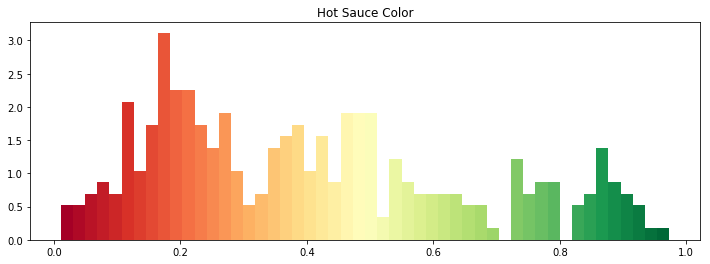

In [11]:
fig, ax = plt.subplots(figsize=(12, 4))

n, bins, patches = ax.hist(color, bins=50, density=True, color='green')
hist_set_colormap(bins, patches, cm.RdYlGn)
ax.set_title("Hot Sauce Color")